In [37]:
#
# BTC_JPY,FX_BTC_JPY,BCH_JPYチャートを折れ線グラフで描く
# BTC_JPY,BCH_JPYの合計価格チャートを折れ線グラフで描く
#
%matplotlib inline
import datetime
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mf
from matplotlib.dates import date2num

In [38]:
import yaml
f = open('default.yaml', 'r+')
config = yaml.load(f)
f.close()
mongo_url = 'mongodb://' + config['mongo_user'] + ':' + config['mongo_pwd'] + '@' + config['mongo_host'] + ':' + config['mongo_port'] + '/' + config['mongo_db']

In [39]:
client = pymongo.MongoClient(mongo_url)
db = client.bitflyer
btc_jpy = db.lightning_executions_BTC_JPY_OHLC_3600
fx_btc_jpy = db.lightning_executions_FX_BTC_JPY_OHLC_3600
bch_btc = db.lightning_executions_BCH_BTC_OHLC_3600
bch_btc = db.lightning_executions_BCH_BTC_OHLC_3600

In [40]:
btc_jpy_date=[]
btc_jpy_price = []

#直近のデータ200件
count = 200

skip = 0
if (btc_jpy.count() > count):
    skip = btc_jpy.count() - count

for data in btc_jpy.find().skip(skip).sort('id',1):
    btc_jpy_date.append(data['op_date'])
    btc_jpy_price.append(data['cl'])


In [41]:
fx_btc_jpy_date=[]
fx_btc_jpy_price = []

skip = 0
if (fx_btc_jpy.count() > count):
    skip = fx_btc_jpy.count() - count

for data in fx_btc_jpy.find().skip(skip).sort('id',1):
    fx_btc_jpy_date.append(data['op_date'])
    fx_btc_jpy_price.append(data['cl'])


In [42]:
bch_jpy_date=[]
bch_jpy_price = []
total_price = []

def getBTCPrice(date):
    for i in range(0, len(btc_jpy_date)):
        if (btc_jpy_date[i].year ==date.year and
           btc_jpy_date[i].month ==date.month and
           btc_jpy_date[i].day ==date.day and
           btc_jpy_date[i].hour ==date.hour):
            return btc_jpy_price[i]
    return 0

skip = 0
if (bch_btc.count() > count):
    skip = bch_btc.count() - count

for data in bch_btc.find().skip(skip).sort('id',1):
    bch_jpy_date.append(data['op_date'])
    # BCH_JPY = BCH_BTC * BTC_JPY
    bch_jpy_price.append(data['cl'] * getBTCPrice(data['op_date']))
    total_price.append((data['cl'] + 1.0) * getBTCPrice(data['op_date']))

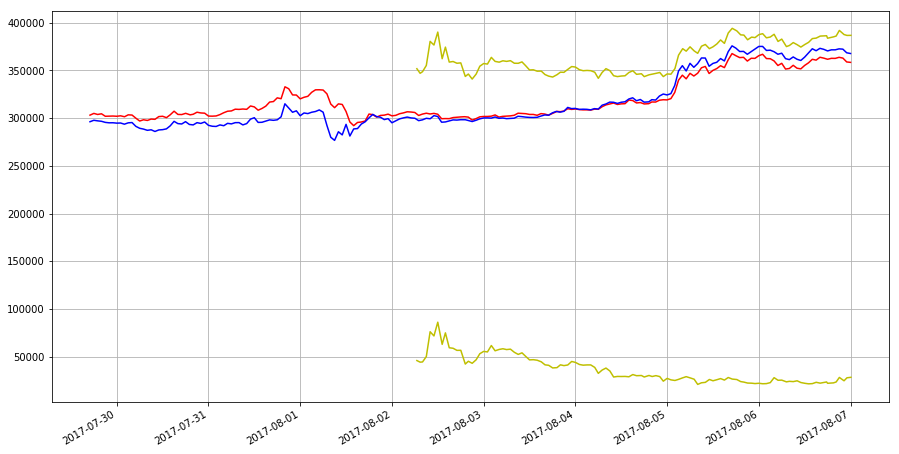

In [43]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(btc_jpy_date, btc_jpy_price, color='r')
ax.plot(fx_btc_jpy_date, fx_btc_jpy_price, color='b')
ax.plot(bch_jpy_date, bch_jpy_price, color='y')
ax.plot(bch_jpy_date, total_price, color='y')
fig.autofmt_xdate()